Accuracy après réalignement : 0.8933333333333333
Adjusted Rand Index : 0.7302382722834697
F1 Score : 0.8917748917748918


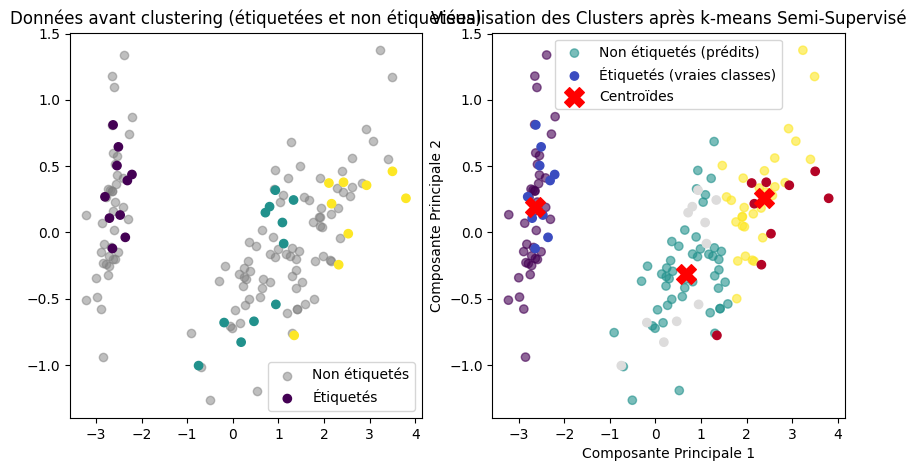

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, f1_score
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement des données
data = load_iris()
X = data.data
y = data.target

# 2. Sélection des données étiquetées (20%)
n_labeled = int(0.2 * len(X))
indices = np.arange(len(X))
np.random.shuffle(indices)
labeled_indices = indices[:n_labeled]
unlabeled_indices = indices[n_labeled:]

X_labeled = X[labeled_indices]
y_labeled = y[labeled_indices]

# 3. k-means semi-supervisé avec k-means++
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 4. Réalignement des étiquettes
conf_matrix = confusion_matrix(y, labels)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
labels_aligned = np.zeros_like(labels)
for i, j in zip(row_ind, col_ind):
    labels_aligned[labels == j] = i

# 5. Évaluation des performances
accuracy_aligned = accuracy_score(y, labels_aligned)
ari = adjusted_rand_score(y, labels)
f1 = f1_score(y, labels_aligned, average='weighted')
print("Accuracy après réalignement :", accuracy_aligned)
print("Adjusted Rand Index :", ari)
print("F1 Score :", f1)

# 6. Visualisation des clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 5))

# Avant clustering
plt.subplot(1, 2, 1)
plt.scatter(X_pca[unlabeled_indices, 0], X_pca[unlabeled_indices, 1], c='gray', alpha=0.5, label='Non étiquetés')
plt.scatter(X_pca[labeled_indices, 0], X_pca[labeled_indices, 1], c=y_labeled, cmap='viridis', label='Étiquetés')
plt.legend()
plt.title("Données avant clustering (étiquetées et non étiquetées)")

# Après clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[unlabeled_indices, 0], X_pca[unlabeled_indices, 1], c=labels_aligned[unlabeled_indices], cmap='viridis', alpha=0.6, label='Non étiquetés (prédits)')
plt.scatter(X_pca[labeled_indices, 0], X_pca[labeled_indices, 1], c=y_labeled, cmap='coolwarm', label='Étiquetés (vraies classes)')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroïdes')
plt.legend()
plt.title("Visualisation des Clusters après k-means Semi-Supervisé")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")

plt.show()